# Addestramento modelli

In [1]:
import warnings
import numpy as np
import pandas as pd
import os

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import utility

In [4]:
from keras.models import load_model

In [5]:
model_trained_base_path = "TrainedModels"
dataset_path = os.path.join("..", "Preprocessing", "Dataset", "dataset_training.csv")

### Import dei dati

In [6]:
df = utility.import_dataset(dataset_path, "2021", "2023")
display(df)

,L1,L2,L3,SumOfLines,Temperature,DayOfWeek,Month,Day,Hour,Holiday
Time,,,,,,,,,,
2021-01-01 00:00:00,983.669142,1117.713692,961.125133,3062.507967,3.428421,4,1,1,0,1.0
2021-01-01 01:00:00,823.919029,1118.131796,930.218646,2872.269471,3.608938,4,1,1,1,1.0
2021-01-01 02:00:00,829.638000,1110.244854,989.942296,2929.825150,3.484612,4,1,1,2,1.0
2021-01-01 03:00:00,1012.239888,1104.282612,993.206479,3109.728979,3.456471,4,1,1,3,1.0
2021-01-01 04:00:00,812.574475,1142.363362,1002.239637,2957.177475,3.925238,4,1,1,4,1.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-31 19:00:00,1758.702608,2371.511483,1678.265894,5808.479985,26.125096,1,5,31,19,0.0
2022-05-31 20:00:00,1634.401029,1945.340814,1664.862742,5244.604585,23.133508,1,5,31,20,0.0
2022-05-31 21:00:00,1742.510279,1890.756617,1589.791269,5223.058164,20.713387,1,5,31,21,0.0


### OneHot encoding e normalizzazione

In [7]:
df, scaler = utility.processing_dataset(df)

### Splitting in training, validation e test

In [8]:
df_train, df_validation, df_test = utility.split_dataset(df, "2021-03", "2022-04")

Train size: 9504 
Validation size: 1416 
Test size: 1464


In [39]:
time_steps = 7 * 24
dim_other_feature = 24 + 7 + 12 + 1

In [40]:
train = utility.windowed_dataset(df_train, time_steps)
validation = utility.windowed_dataset(df_validation, time_steps)
test = utility.windowed_dataset(df_test, time_steps)

### Result of training

In [53]:
base_path = os.path.join(model_trained_base_path, "model2-168")
plot_path = os.path.join(base_path, "Predictions")
model = load_model(os.path.join(base_path, "weights-model.h5"))
history = utility.read_history(os.path.join(base_path, "history-model.json")) 

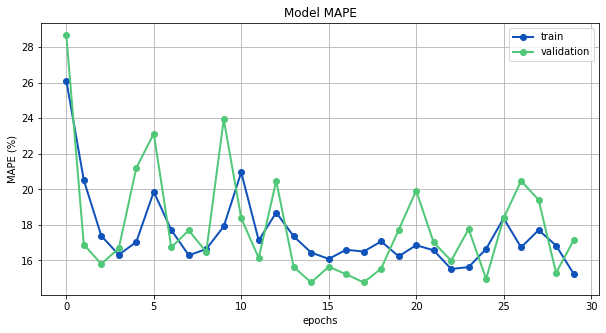

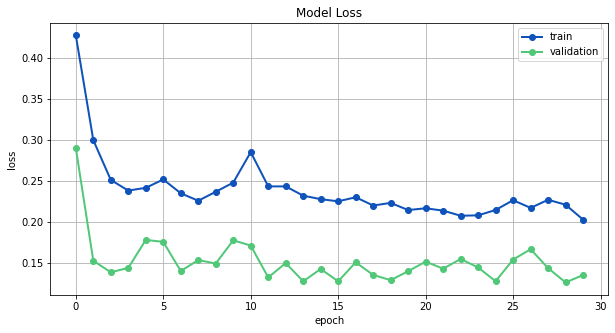

In [54]:
utility.plot_history(history, "#0F52BA", "#50C878")

In [62]:
y_pred_test = model.predict(utility.get_x(train, "SumOfLines"))
y_pred_test_inv = scaler.inverse_transform(y_pred_test)
df_prediction_train = utility.add_prediction(df_train, y_pred_test_inv, time_steps, "SumOfLinesPredicted")
mape = utility.MAPE(df_prediction_train["SumOfLines"], df_prediction_train["SumOfLinesPredicted"])
print("MAPE training set:", mape)

y_pred_test = model.predict(utility.get_x(validation, "SumOfLines"))
y_pred_test_inv = scaler.inverse_transform(y_pred_test)
df_prediction_validation = utility.add_prediction(df_validation, y_pred_test_inv, time_steps, "SumOfLinesPredicted")
mape = utility.MAPE(df_prediction_validation["SumOfLines"], df_prediction_validation["SumOfLinesPredicted"])
print("MAPE validation set:", mape)

MAPE training set: 7.174510588440578
MAPE validation set: 5.801565465772713


In [63]:
fields = ["SumOfLines", "SumOfLinesPredicted"]

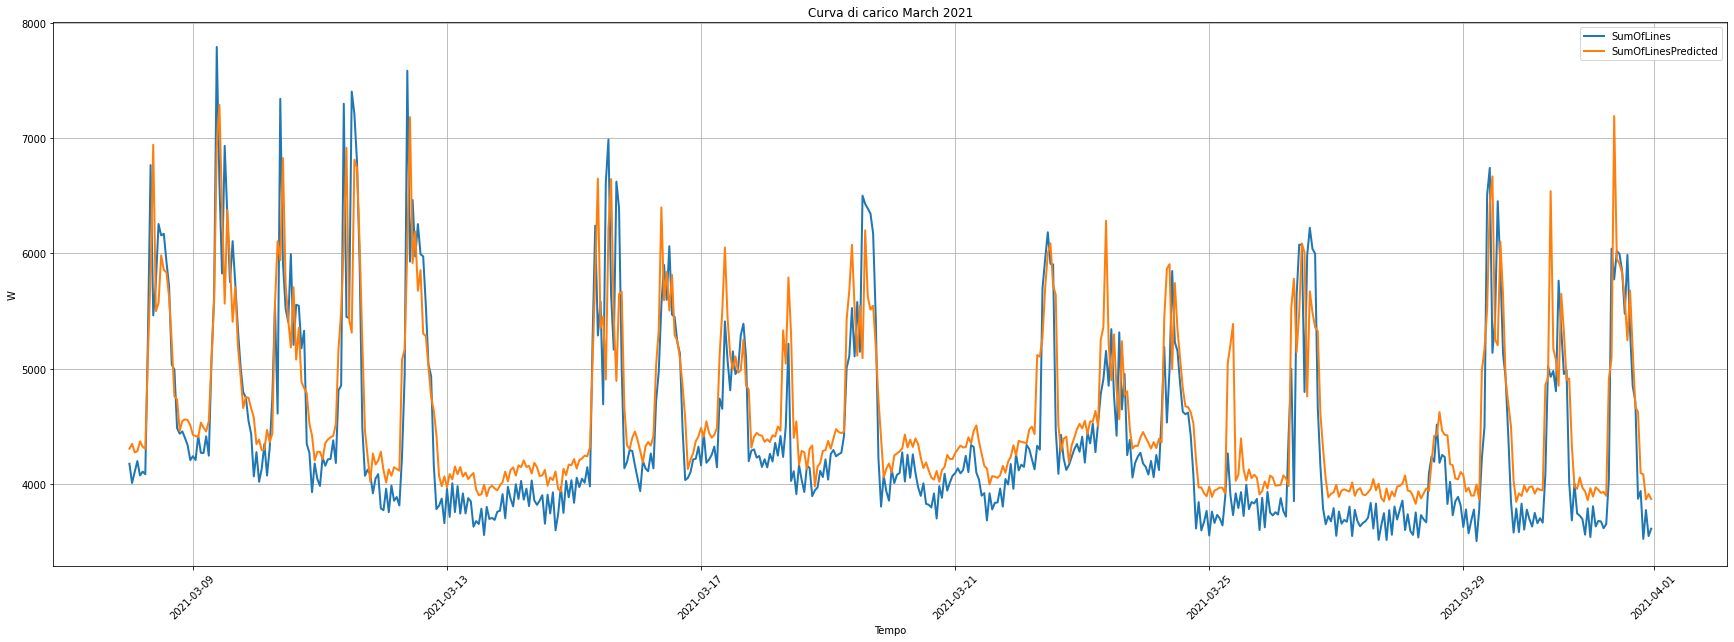

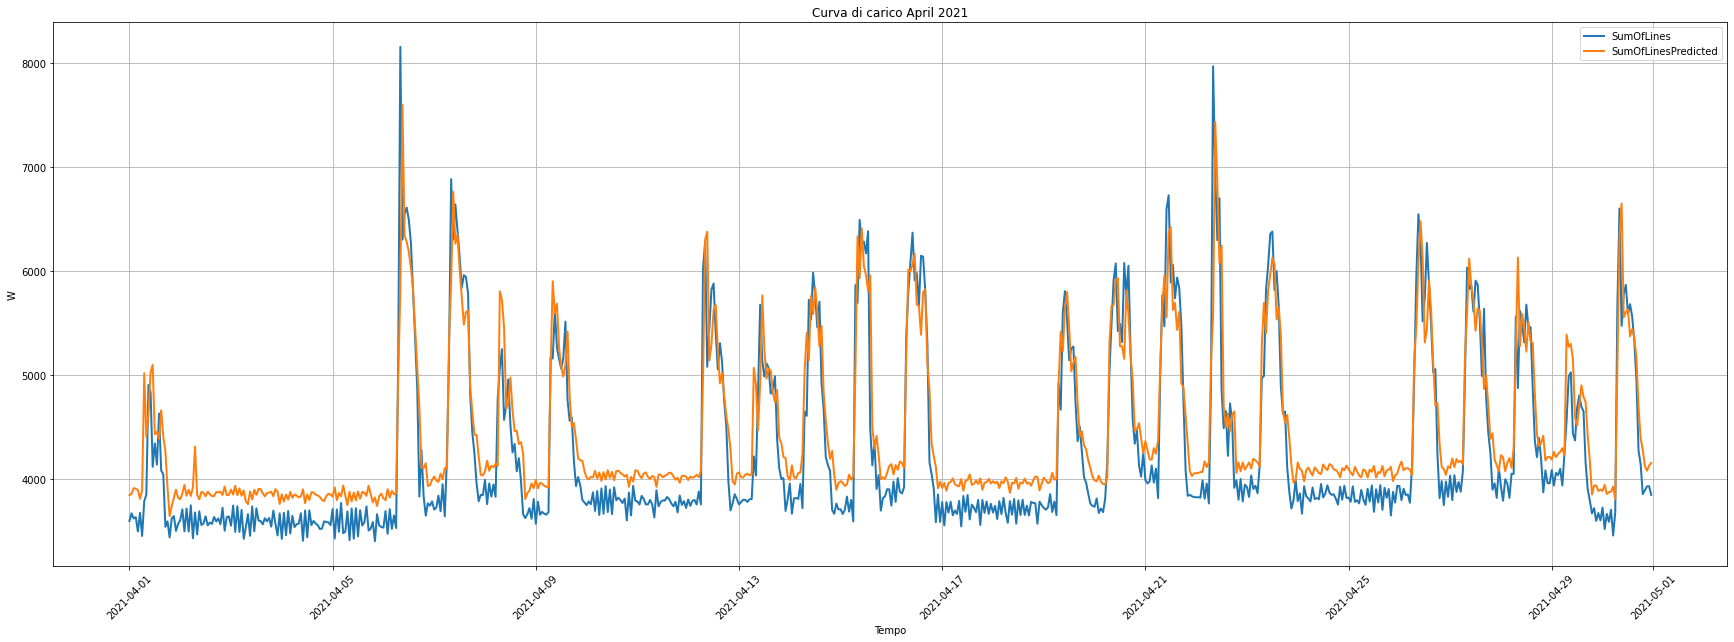

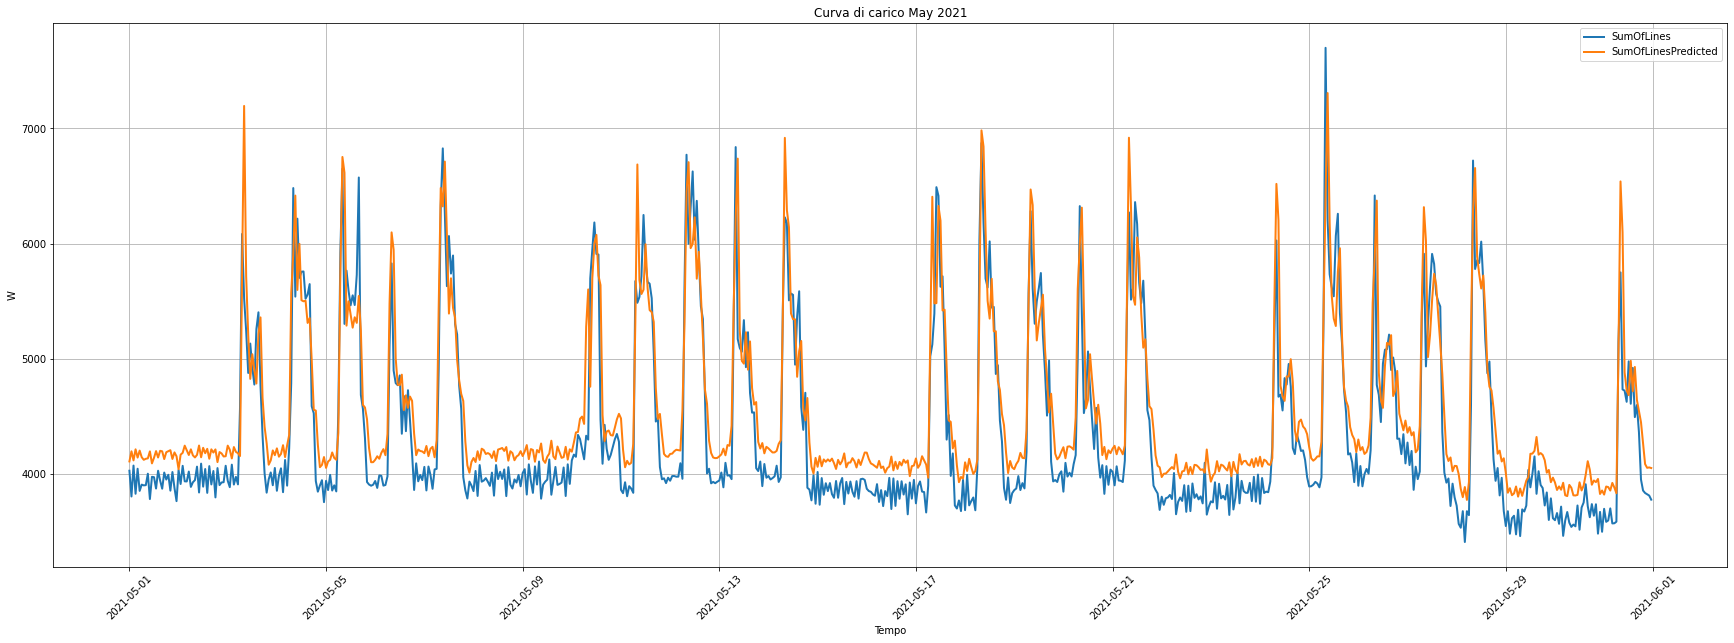

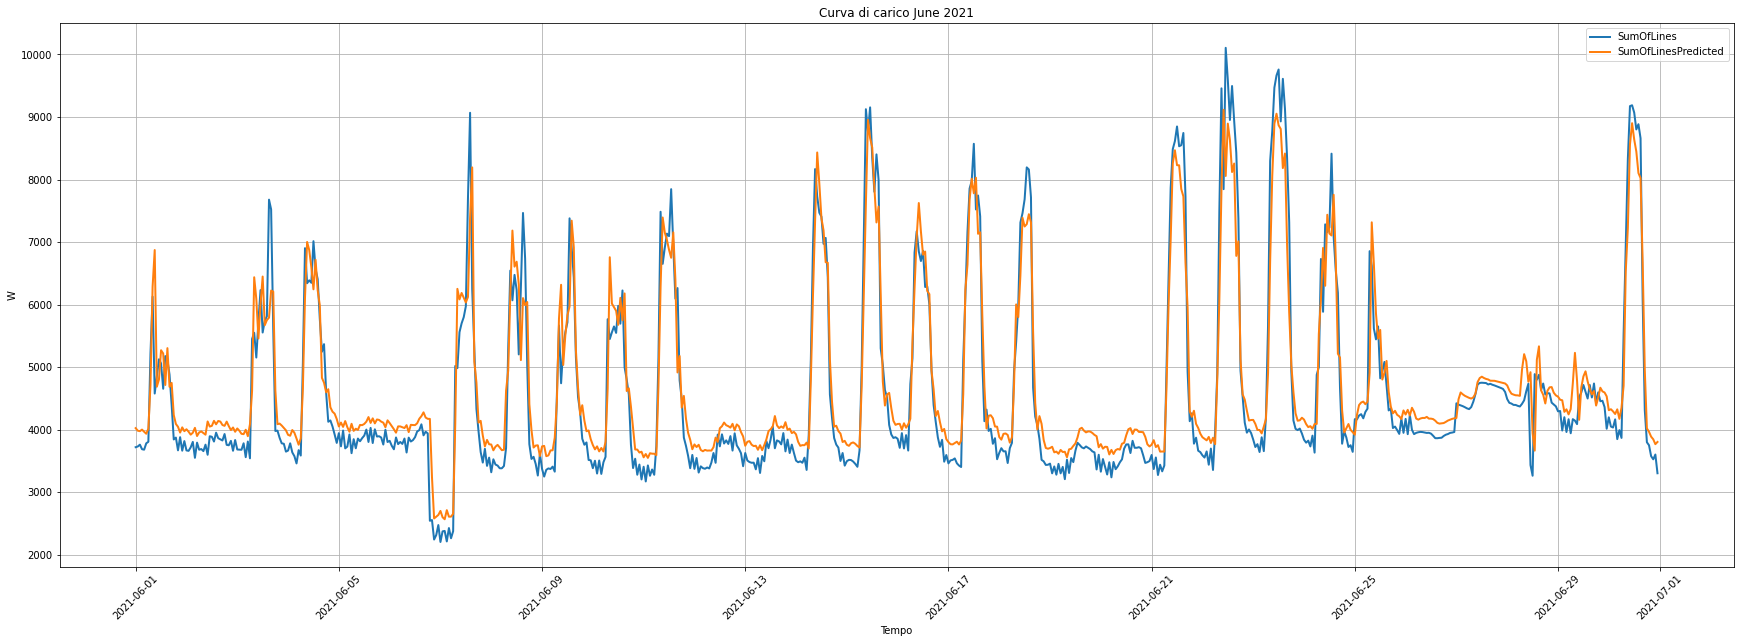

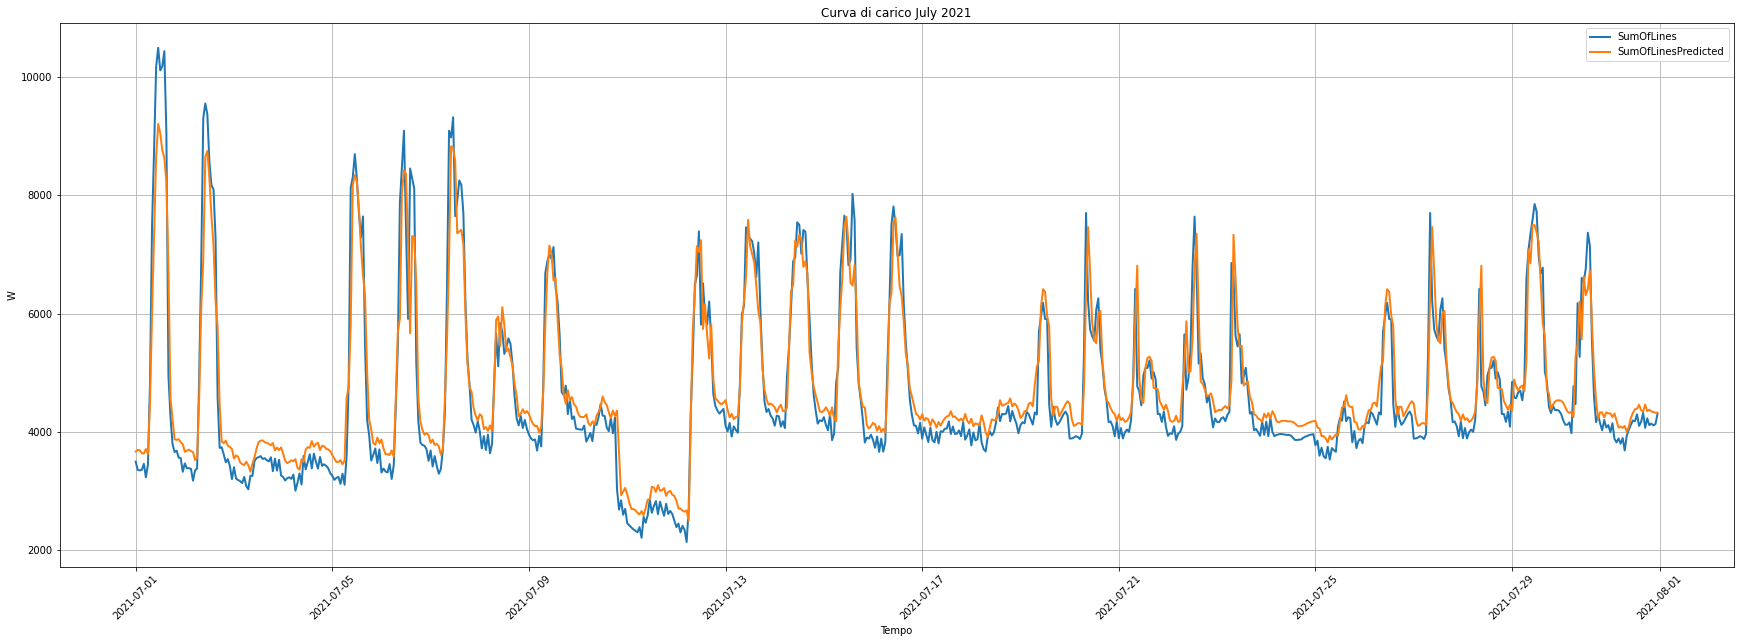

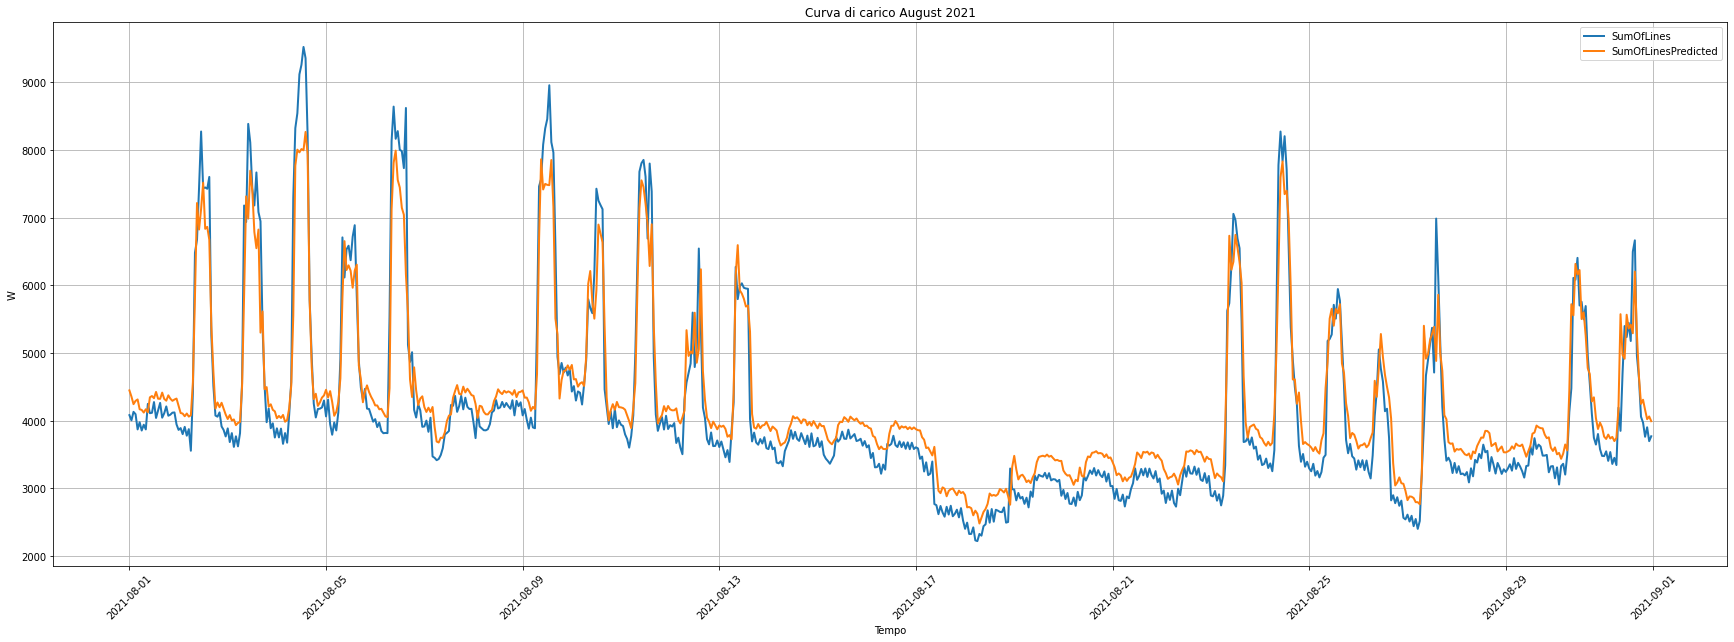

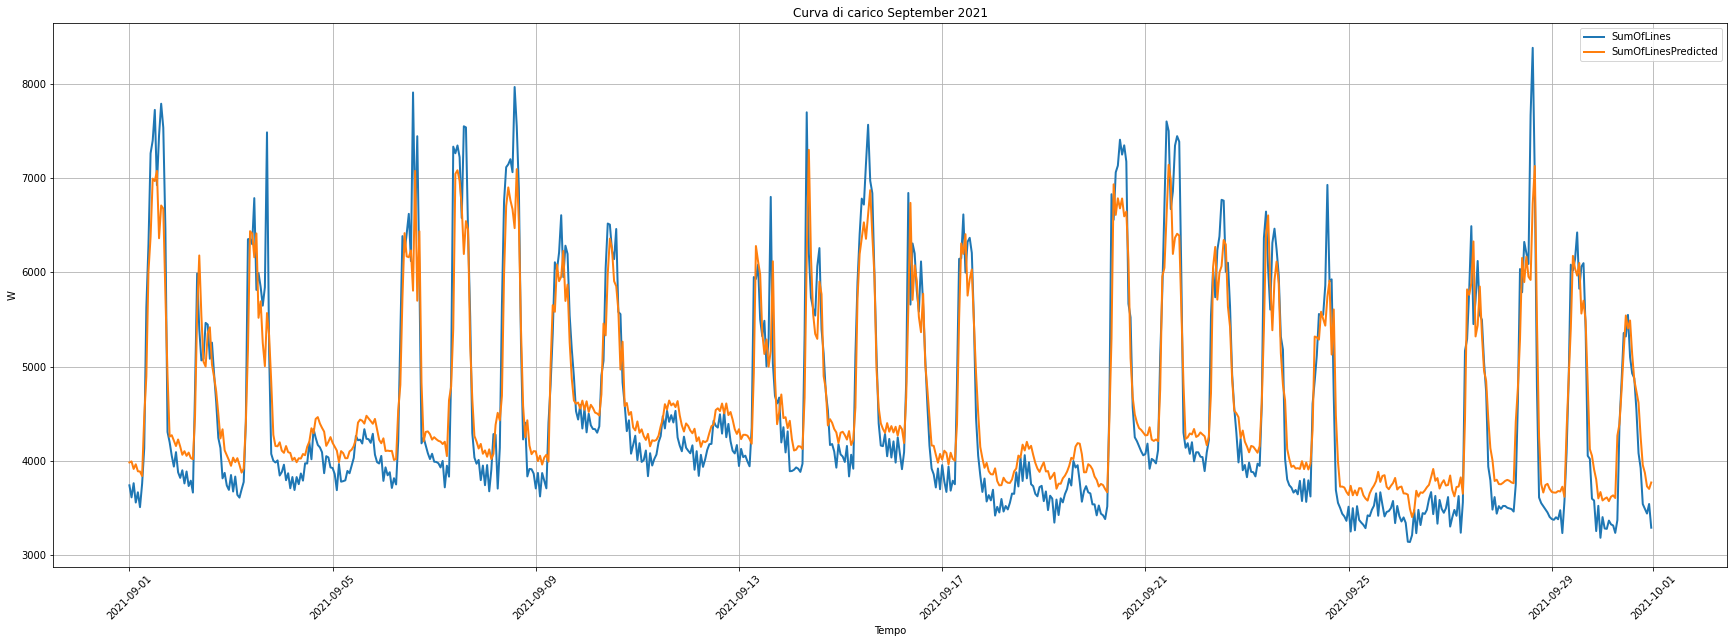

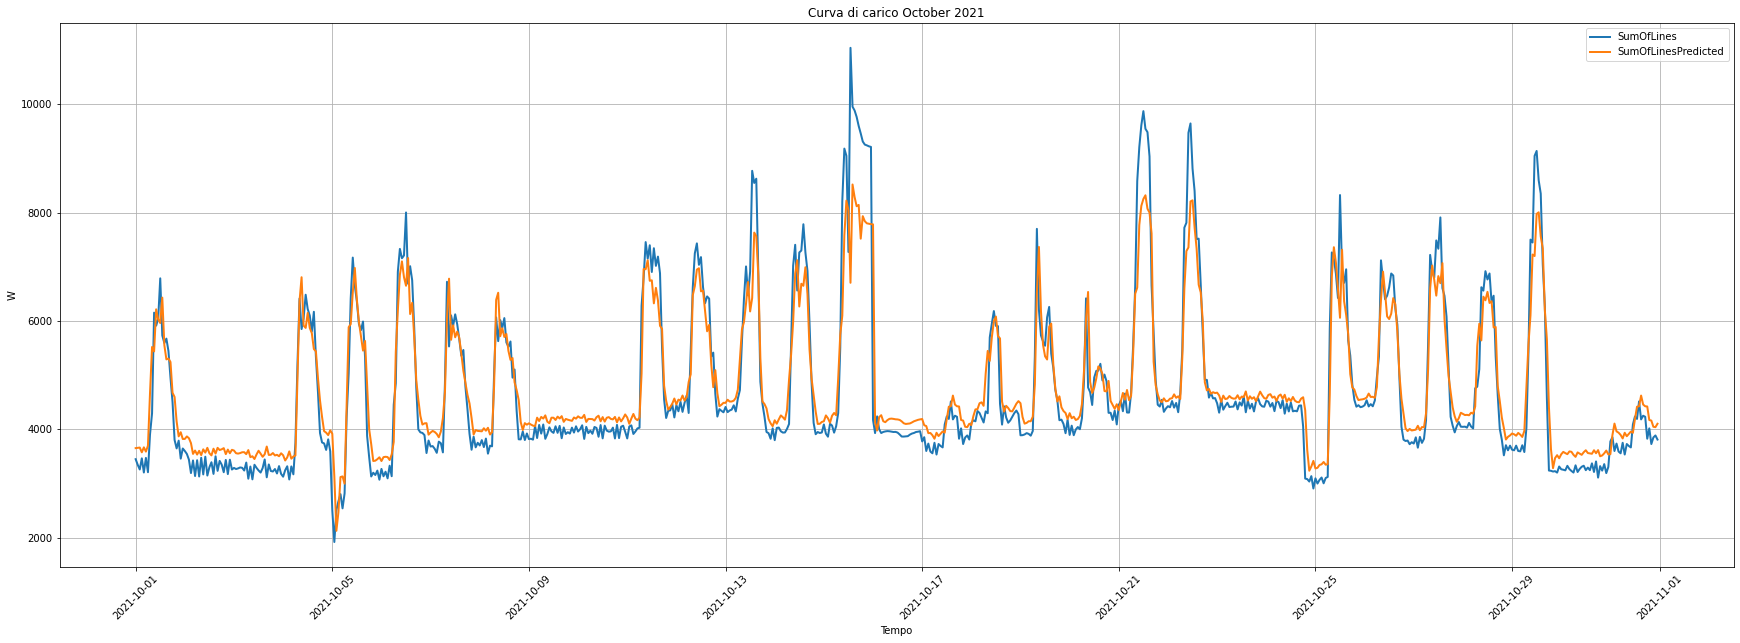

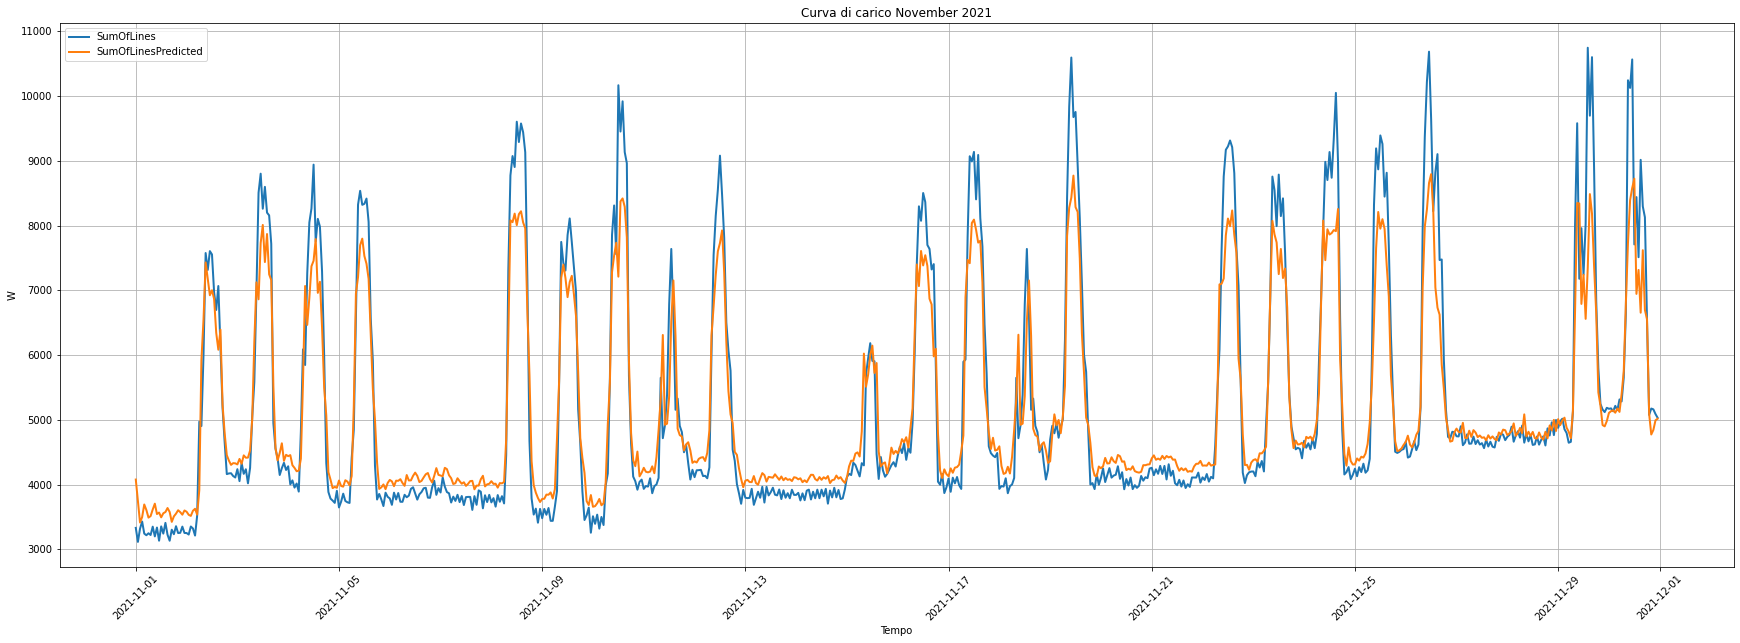

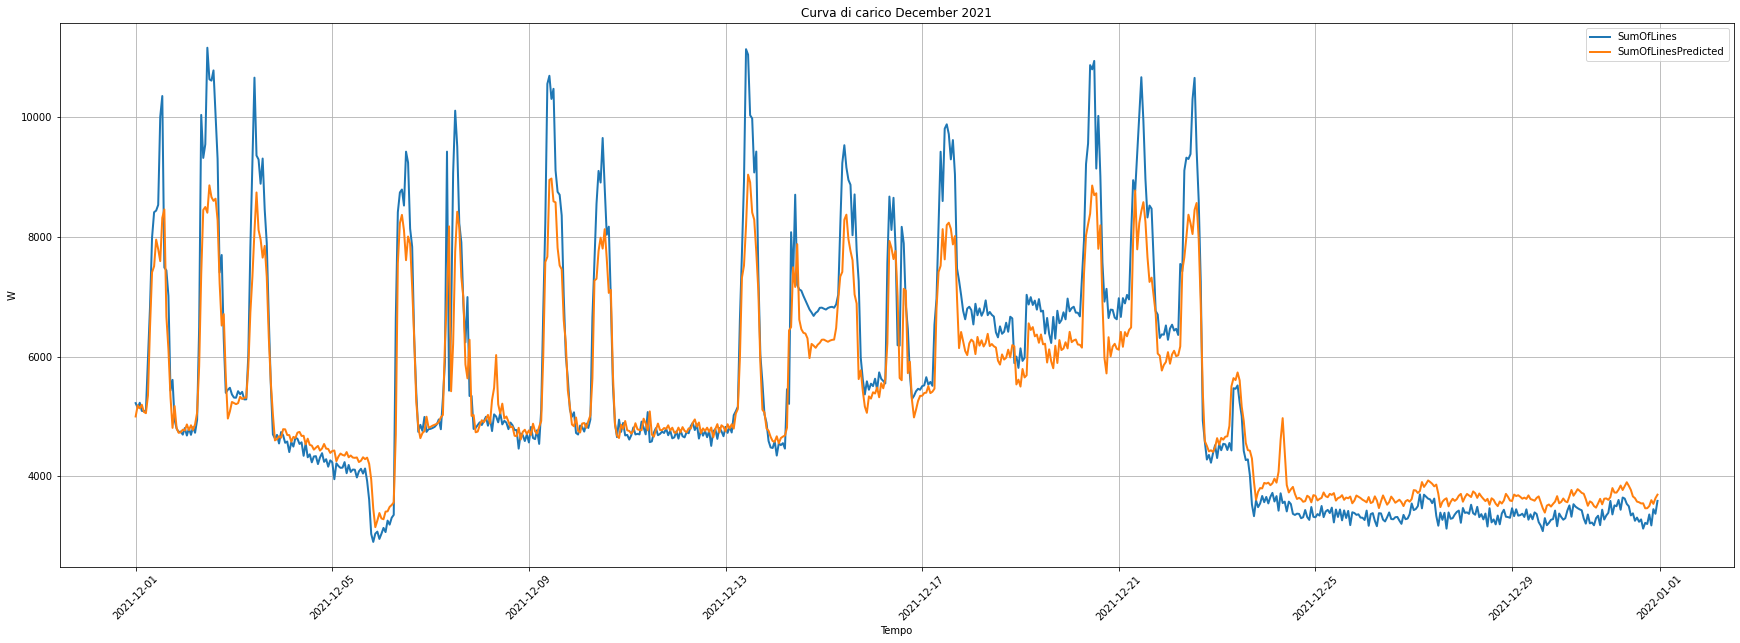

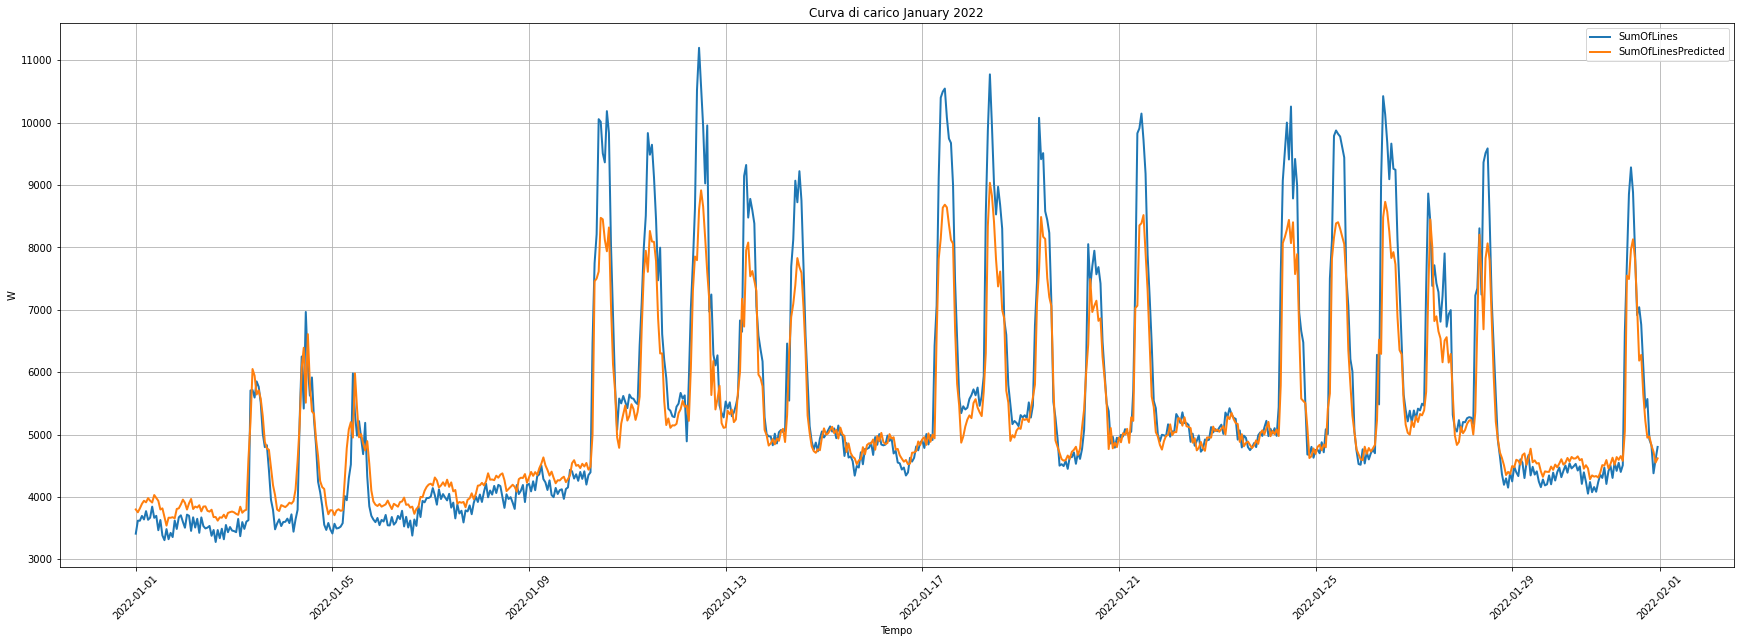

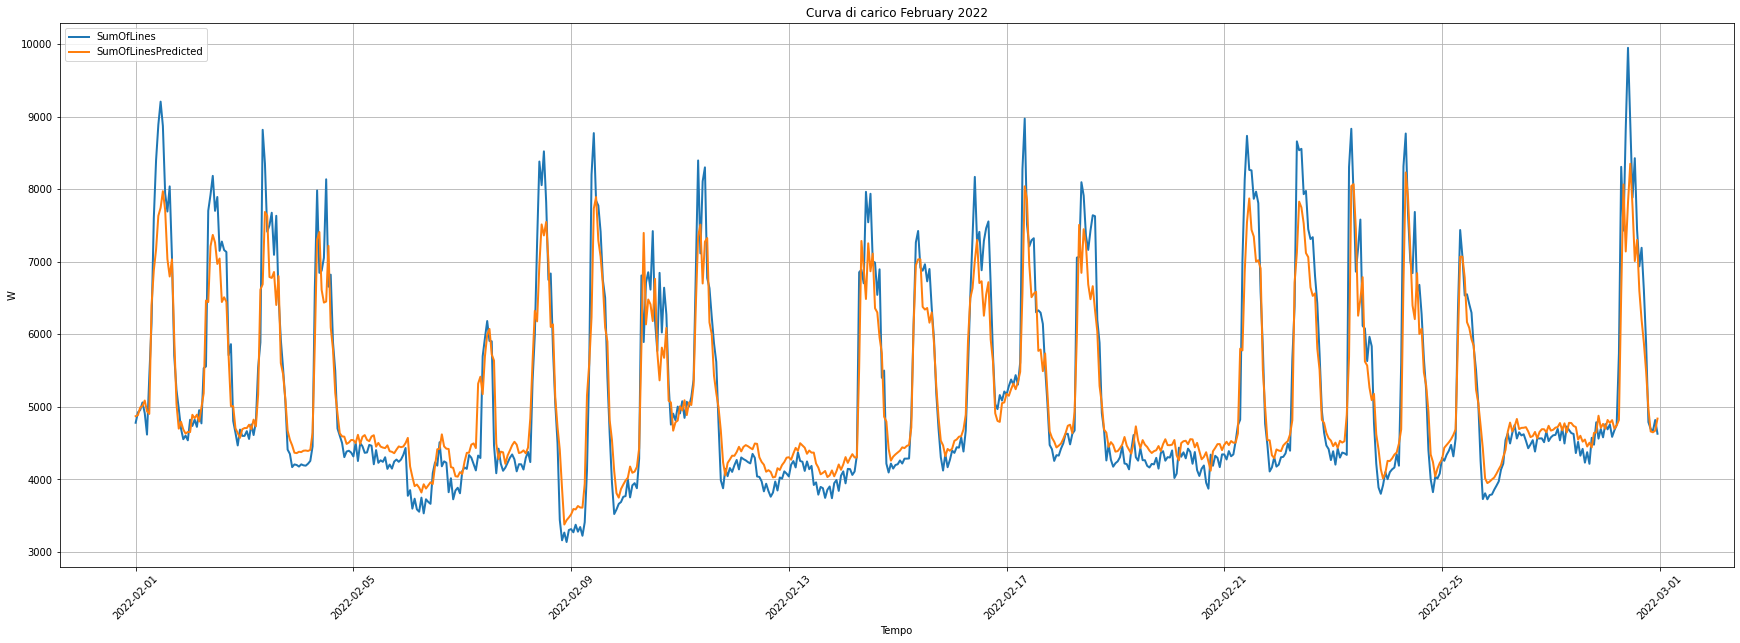

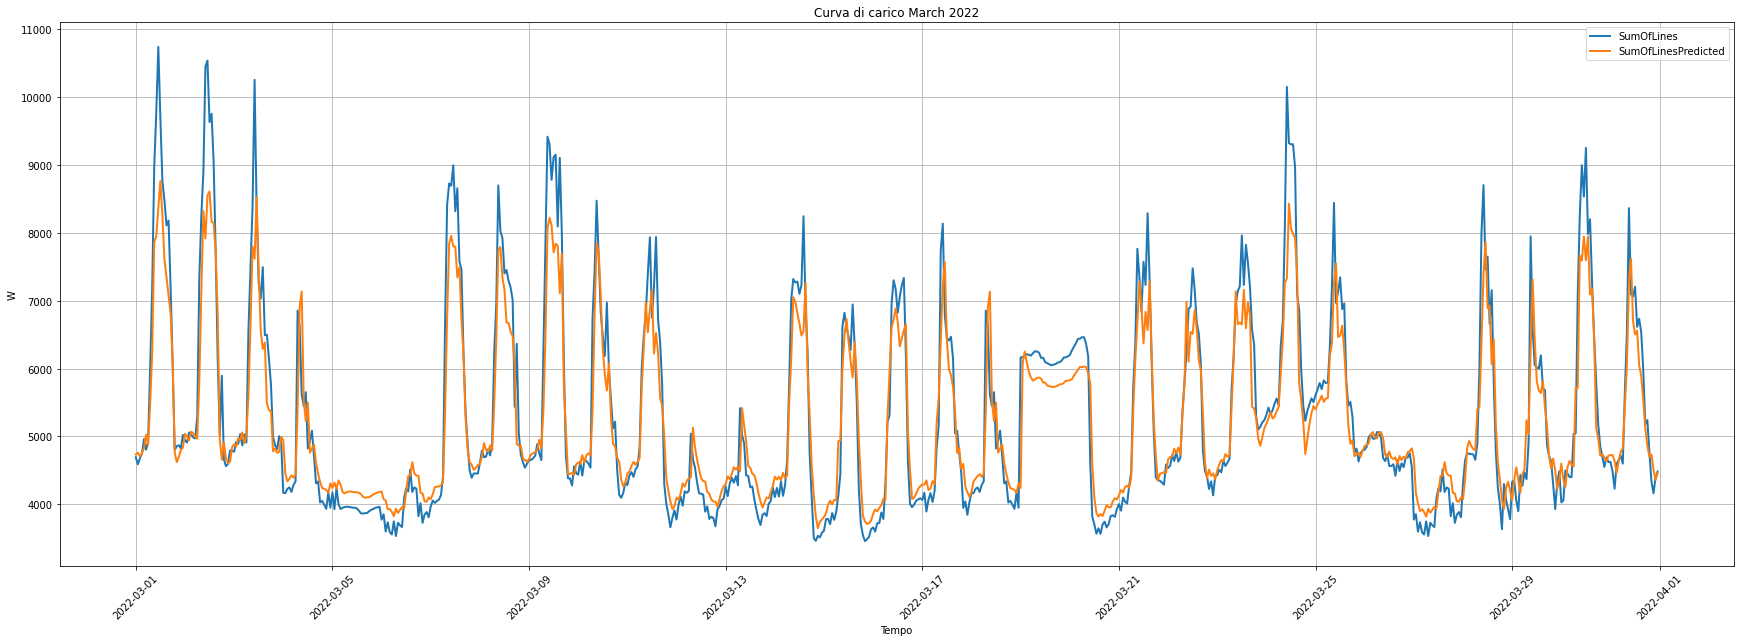

In [64]:
utility.plot_distribution_load(df_prediction_train, fields)

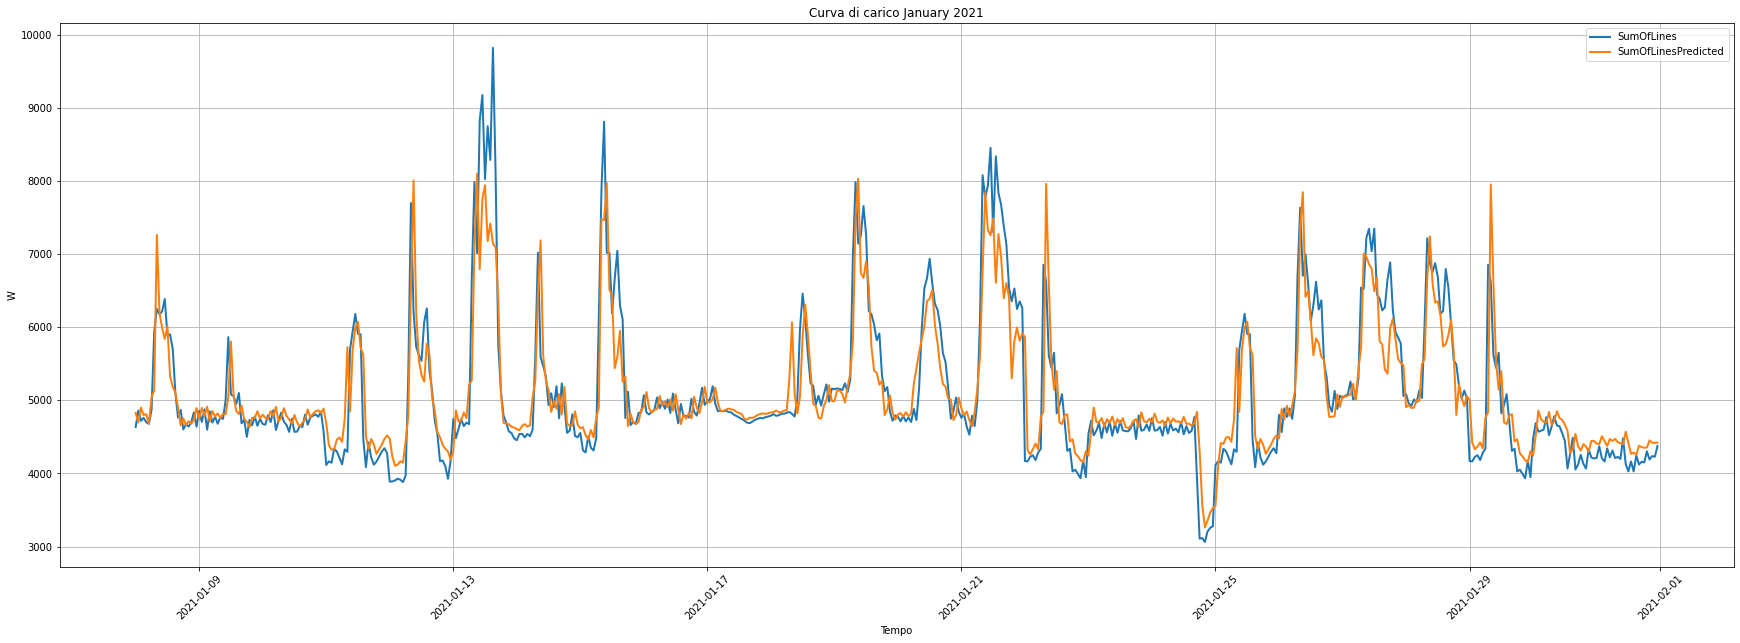

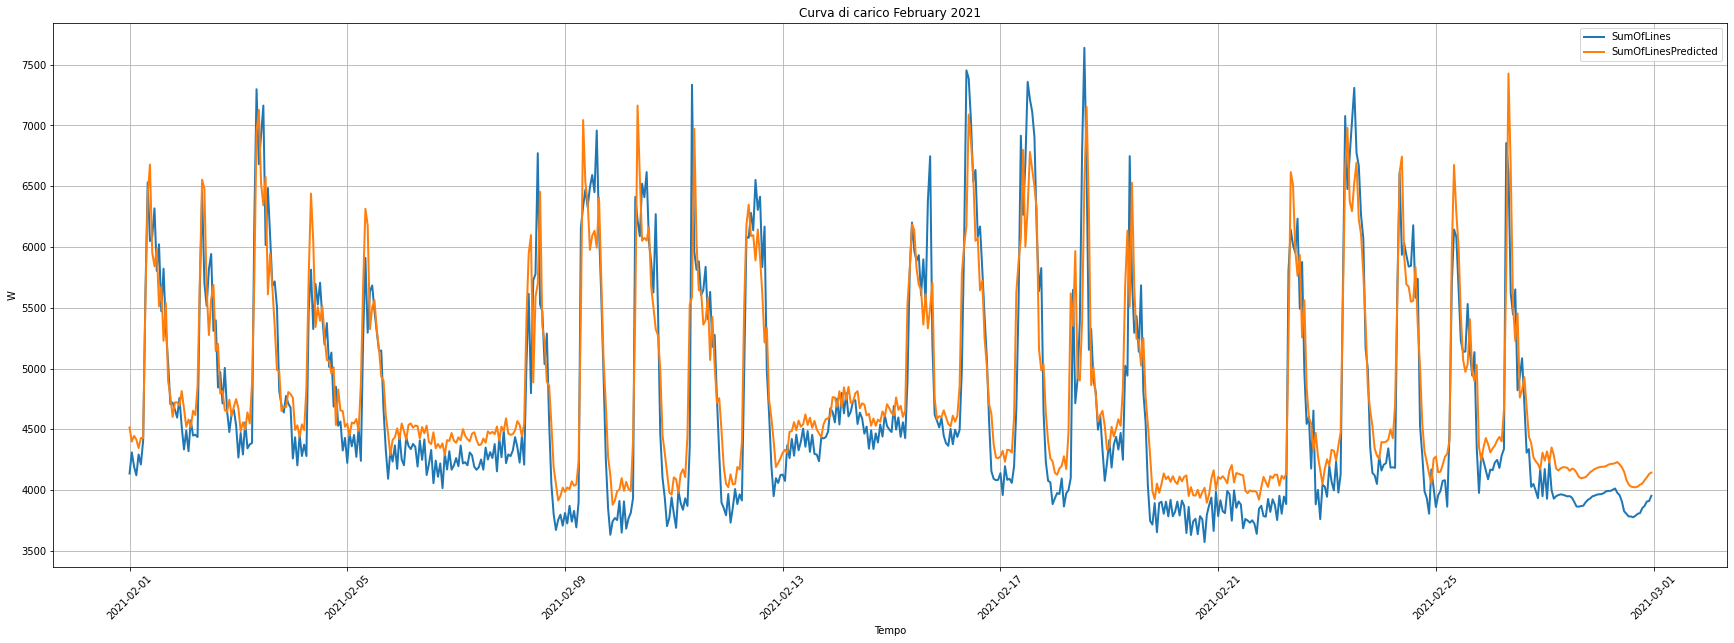

In [65]:
utility.plot_distribution_load(df_prediction_validation, fields, plot_path)